In [142]:
import scirpy as ir

In [143]:
import scanpy as sc

In [144]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [145]:
import muon as mu

In [146]:
import numpy as np

In [6]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    #adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    #adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [148]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
#adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    #adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    #adatas_gex_2021[sample] = adata_gex_2021

In [161]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11mix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

## Load GEX

In [150]:
adata = sc.read_h5ad("adata_solo_annotated_all.h5ad")

In [11]:
adata_colon = adata[adata.obs["origin"]=="colon"]

In [12]:
adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)

/tmp/ipykernel_2679378/2241666715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)
/tmp/ipykernel_2679378/2241666715.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted",

In [151]:
adata_til = adata[adata.obs["origin"]=="til"]

In [152]:
adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('MPEC_Progenitor','MPEC_Naive', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Effector','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Inf','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Plastic','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Terminal','SLEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Progenitor','SLEC_Naive', inplace=True)

/tmp/ipykernel_2679378/3924628280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
/tmp/ipykernel_2679378/3924628280.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted',

In [153]:
# Merge anndata objects
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [154]:
adata_tcr.obs

""
cell_id
AAACCTGAGTCTTGCA-1_10mix1
AAACCTGAGTTAAGTG-1_10mix1
AAACCTGCAGGATCGA-1_10mix1
AAACCTGCATACCATG-1_10mix1
AAACCTGCATTGAGCT-1_10mix1
...
TTTGCGCTCGGTGTTA-1_GF2
TTTGTCAAGGCTAGCA-1_GF2
TTTGTCAAGTGCCAGA-1_GF2


In [17]:
adata_colon.obs.sample_id.value_counts()

sample_id
11mix2    3196
11mix1    2266
10mix1    2206
10mix2    1618
GF1       1520
GF2        343
Name: count, dtype: int64

In [155]:
# Merge anndata objects
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [18]:
adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_2679378/2579415858.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]


In [21]:
adata_colon.obs["sample"].value_counts()

sample
11mix2    3196
11mix1    2266
10mix1    2206
10mix2    1618
GF1       1520
GF2        343
Name: count, dtype: int64

In [76]:
adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_2679378/2114681352.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]


In [84]:
adata_til.obs.sample_id.value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [86]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_mt,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier
AAACCTGAGAGCCTAG-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.000000,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False
AAACCTGAGGCTCTTA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,0.975798,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False
AAACCTGAGGGCTTGA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,0.984529,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False
AAACCTGAGGTTACCT-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.473887,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False
AAACCTGCAACCGCCA-1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,0.000000,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.997952,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False
TTTGTCATCGTTGCCT-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,0.508929,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False
TTTGTCATCTAACTGG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.569025,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.986108,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False


In [28]:
adata_tcr.obs["sample"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]

In [29]:
adata_tcr.obs["sample"].value_counts()

sample
11mix2    3730
10mix1    2898
11mix1    2785
GF1       2668
10mix2    2267
GF2        859
Name: count, dtype: int64

In [30]:
adata_tcr.obs["group"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["group"])
adata_tcr.obs["condition"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["condition"])

In [31]:
adata_tcr.obs["group"].value_counts()

group
11mix    6515
10mix    5165
GF       3527
Name: count, dtype: int64

In [32]:
adata_tcr.obs

,sample,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1,10mix1,10mix,naive
...,...,...,...
TTTGCGCTCGGTGTTA-1_GF2,GF2,GF,naive
TTTGTCAAGGCTAGCA-1_GF2,GF2,GF,naive
TTTGTCAAGTGCCAGA-1_GF2,GF2,GF,naive


In [156]:
adata_tcr_2021.obs["sample"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]

In [157]:

adata_tcr_2021.obs_names = adata_tcr_2021.obs_names.str.replace('-', '_')


In [158]:
adata_tcr_2021.obs.value_counts()

sample      
10mix-ICI2      8543
11mix-ICI2      7808
11mix-ICI1      7735
GF-ICI2-plus    7406
10mix-ICI1      7265
GF-ICI1-plus    6247
GF-ICI1         5840
GF-ICI2         5461
Name: count, dtype: int64

In [159]:
adata_til.obs.sample_id.value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [163]:
# Set global met'adata on `mdata.obs`
adata_tcr_2021.obs["sample_id"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]
#adata_tcr_2021.obs["group"] = adata_tcr_2021.obs["sample_id"].map(lambda x: samples[x]["group"])
adata_tcr_2021.obs["condition"] = adata_tcr_2021.obs["sample"].map(lambda x: samples[x]["condition"])

In [165]:
#adata_tcr_2021.obs.group.value_counts()

In [166]:
adata_tcr_2021.obs.condition.value_counts()

condition
ICI       45004
No ICI    11301
Name: count, dtype: int64

In [167]:
adata_tcr_2021.obs.sample_id.value_counts()

sample_id
1    56305
Name: count, dtype: int64

In [168]:
adata_tcr_2021.obs

,sample,sample_id,condition
cell_id,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,10mix-ICI1,1,ICI
AAACCTGAGGCTCTTA_1_10mix_ICI1,10mix-ICI1,1,ICI
AAACCTGAGGGCACTA_1_10mix_ICI1,10mix-ICI1,1,ICI
AAACCTGAGGGCTTGA_1_10mix_ICI1,10mix-ICI1,1,ICI
AAACCTGAGGTTACCT_1_10mix_ICI1,10mix-ICI1,1,ICI
...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,GF-ICI2-plus,1,ICI
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,GF-ICI2-plus,1,ICI
TTTGTCATCTAACTGG_1_GF_ICI2_plus,GF-ICI2-plus,1,ICI


In [169]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_mt,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier
AAACCTGAGAGCCTAG-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.000000,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False
AAACCTGAGGCTCTTA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,0.975798,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False
AAACCTGAGGGCTTGA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,0.984529,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False
AAACCTGAGGTTACCT-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.473887,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False
AAACCTGCAACCGCCA-1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,0.000000,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.997952,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False
TTTGTCATCGTTGCCT-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,0.508929,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False
TTTGTCATCTAACTGG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.569025,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.986108,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False


In [170]:
adata_til.obs_names = adata_til.obs_names.str.replace('-', '_')

In [171]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_mt,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier
AAACCTGAGAGCCTAG_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.000000,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False
AAACCTGAGGCTCTTA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,0.975798,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False
AAACCTGAGGGCTTGA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,0.984529,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False
AAACCTGAGGTTACCT_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.473887,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False
AAACCTGCAACCGCCA_1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,0.000000,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.997952,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False
TTTGTCATCGTTGCCT_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,0.508929,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False
TTTGTCATCTAACTGG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.569025,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False
TTTGTCATCTCTGTCG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.986108,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False


In [24]:
adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [27]:
adata_gex_merge = anndata.concat([adata_colon,adata_til], index_unique="_")

In [59]:
adata_gex_merge.obs.sample_id.value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
11mix2          3196
11mix1          2266
10mix1          2206
10mix2          1618
GF1             1520
GF2              343
Name: count, dtype: int64

In [97]:
mdata["airr"].obs["origin"]

cell_id
AAACCTGAGTCTTGCA-1_10mix1_0          til
AAACCTGAGTTAAGTG-1_10mix1_0          til
AAACCTGCAGGATCGA-1_10mix1_0          til
AAACCTGCATACCATG-1_10mix1_0          til
AAACCTGCATTGAGCT-1_10mix1_0          til
                                    ... 
TTTGTCATCCAGAGGA-1_GF-ICI2-plus_1    til
TTTGTCATCCCTTGCA-1_GF-ICI2-plus_1    til
TTTGTCATCTAACTGG-1_GF-ICI2-plus_1    til
TTTGTCATCTCTGTCG-1_GF-ICI2-plus_1    til
TTTGTCATCTGTTGAG-1_GF-ICI2-plus_1    til
Name: origin, Length: 71512, dtype: category
Categories (1, object): ['til']

In [29]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

In [35]:
mdata = mu.MuData({"gex": adata_colon, "airr": adata_tcr})

In [172]:
mdata = mu.MuData({"gex": adata_til, "airr": adata_tcr_2021})

In [103]:
mdata_til = mu.MuData({"gex": adata_til, "airr": adata_tcr_2021})

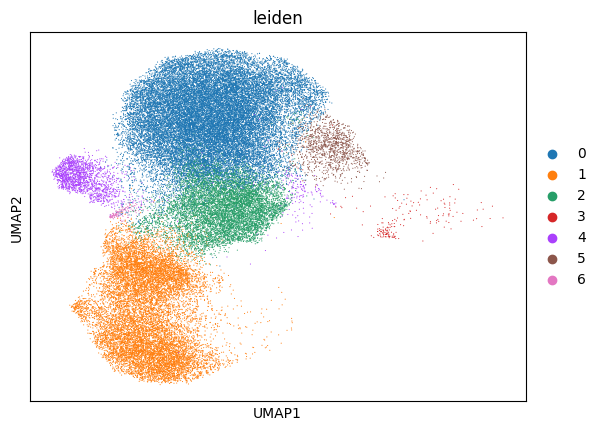

In [173]:
sc.pl.umap(mdata["gex"], color = "leiden")

In [174]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

In [175]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [176]:
# Define the conditions
colon_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata["airr"].obs["origin"] = mdata["airr"].obs["sample"].apply(
    lambda x: "colon" if x in colon_samples else "til"
)

In [177]:
mdata["gex"].obs["sample_id"].value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [178]:
mdata["airr"].obs["sample"].value_counts()

sample
10mix-ICI2      8543
11mix-ICI2      7808
11mix-ICI1      7735
GF-ICI2-plus    7406
10mix-ICI1      7265
GF-ICI1-plus    6247
GF-ICI1         5840
GF-ICI2         5461
Name: count, dtype: int64

In [179]:
mdata

MuData object with n_obs × n_vars = 63776 × 11945
  2 modalities
    gex:	49310 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'hvg', 'is_doublet_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap', 'pca'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	56305 x 0
      obs:	'sample', 'sample_id', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [180]:
mdata["gex"].obs["sample_id"].value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [181]:
mdata["airr"].obs["origin"].value_counts()

origin
til    56305
Name: count, dtype: int64

In [182]:
ir.get.airr(mdata, ["locus", "productive"])

,VJ_1_locus,VJ_1_productive,VDJ_1_locus,VDJ_1_productive,VJ_2_locus,VJ_2_productive,VDJ_2_locus,VDJ_2_productive
cell_id,,,,,,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGCTCTTA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGGCACTA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGGCTTGA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGTTACCT_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
...,...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,TRA,True,TRB,True,TRA,True,None,None
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,TRA,True,TRB,True,None,None,None,None
TTTGTCATCTAACTGG_1_GF_ICI2_plus,TRA,True,TRB,True,TRA,True,None,None


In [183]:
mdata["gex"].obs_names

Index(['AAACCTGAGAGCCTAG_1_10mix_ICI1', 'AAACCTGAGGCTCTTA_1_10mix_ICI1',
       'AAACCTGAGGGCTTGA_1_10mix_ICI1', 'AAACCTGAGGTTACCT_1_10mix_ICI1',
       'AAACCTGCAACCGCCA_1_10mix_ICI1', 'AAACCTGCAGTATGCT_1_10mix_ICI1',
       'AAACCTGCAGTCCTTC_1_10mix_ICI1', 'AAACCTGCAGTTCCCT_1_10mix_ICI1',
       'AAACCTGGTAGGCATG_1_10mix_ICI1', 'AAACCTGGTCTAGTCA_1_10mix_ICI1',
       ...
       'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus', 'TTTGTCATCAATAAGG_1_GF_ICI2_plus',
       'TTTGTCATCACGCATA_1_GF_ICI2_plus', 'TTTGTCATCATGGTCA_1_GF_ICI2_plus',
       'TTTGTCATCCAGAGGA_1_GF_ICI2_plus', 'TTTGTCATCCCTTGCA_1_GF_ICI2_plus',
       'TTTGTCATCGTTGCCT_1_GF_ICI2_plus', 'TTTGTCATCTAACTGG_1_GF_ICI2_plus',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus', 'TTTGTCATCTGTTGAG_1_GF_ICI2_plus'],
      dtype='object', length=49310)

In [184]:
mdata["airr"].obs_names

Index(['AAACCTGAGAGCCTAG_1_10mix_ICI1', 'AAACCTGAGGCTCTTA_1_10mix_ICI1',
       'AAACCTGAGGGCACTA_1_10mix_ICI1', 'AAACCTGAGGGCTTGA_1_10mix_ICI1',
       'AAACCTGAGGTTACCT_1_10mix_ICI1', 'AAACCTGCAACCGCCA_1_10mix_ICI1',
       'AAACCTGCACTTCTGC_1_10mix_ICI1', 'AAACCTGCAGGAACGT_1_10mix_ICI1',
       'AAACCTGCAGTCCTTC_1_10mix_ICI1', 'AAACCTGGTAGGCATG_1_10mix_ICI1',
       ...
       'TTTGTCAGTGCTTCTC_1_GF_ICI2_plus', 'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus',
       'TTTGTCATCAATAAGG_1_GF_ICI2_plus', 'TTTGTCATCACGCATA_1_GF_ICI2_plus',
       'TTTGTCATCATGGTCA_1_GF_ICI2_plus', 'TTTGTCATCCAGAGGA_1_GF_ICI2_plus',
       'TTTGTCATCCCTTGCA_1_GF_ICI2_plus', 'TTTGTCATCTAACTGG_1_GF_ICI2_plus',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus', 'TTTGTCATCTGTTGAG_1_GF_ICI2_plus'],
      dtype='object', name='cell_id', length=56305)

In [185]:
# Replace "-" with "_" in the 'obs_names' column
mdata["airr"].obs_names = mdata["airr"].obs_names.str.replace('-', '_')

In [186]:
mdata.update()

In [187]:
len(set(mdata["gex"].obs_names) & set(mdata["airr"].obs_names))

41839

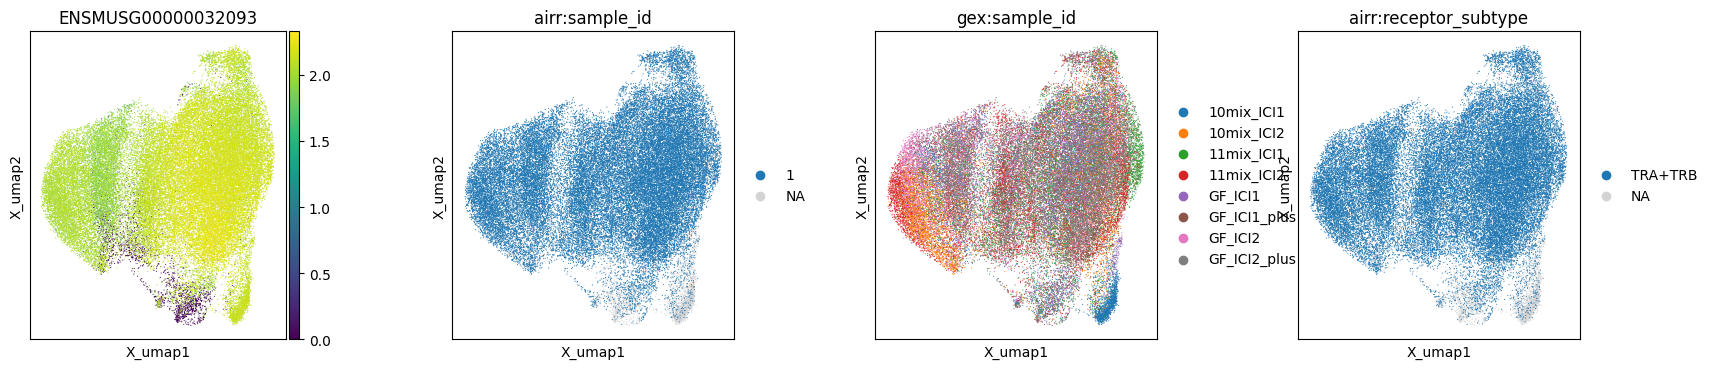

In [188]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:sample_id"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample_id"], ax=ax2, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3)

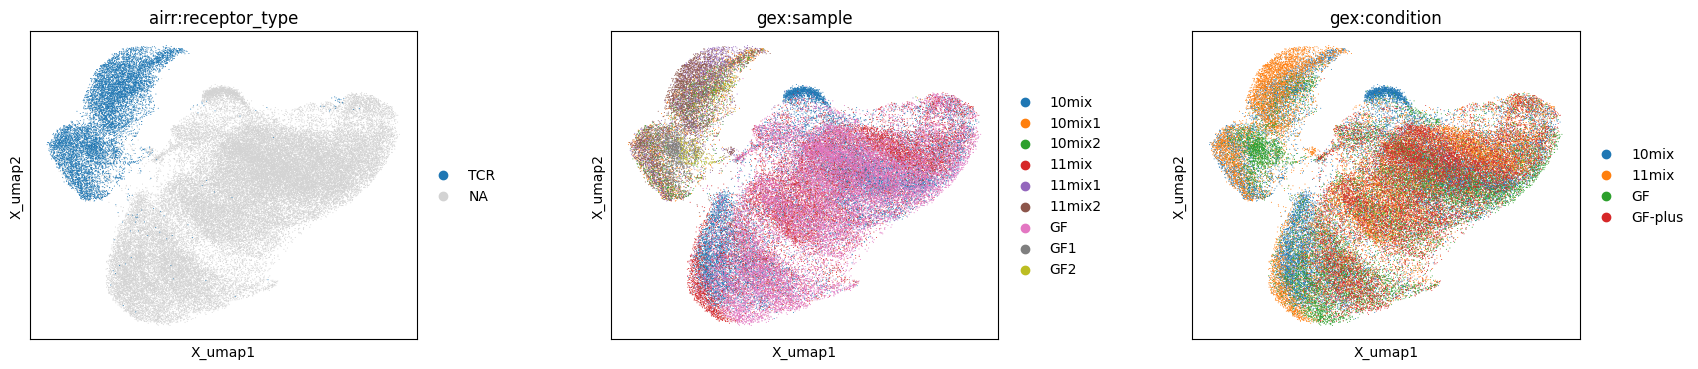

In [46]:
fig, (ax0, ax1,ax2) = plt.subplots(1, 3, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_type"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:condition"], ax=ax2)

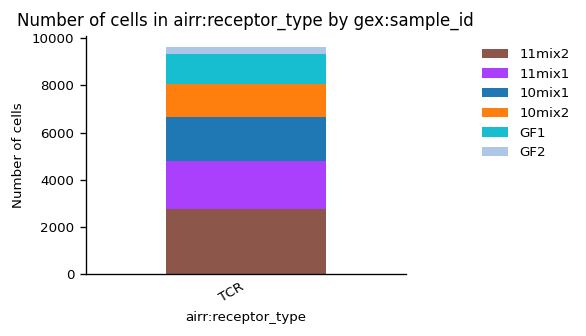

In [92]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample_id"
)


In [105]:
### TIL

In [106]:
sc.pp.log1p(mdata_til["gex"])
sc.pp.pca(mdata_til["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata_til["gex"])
sc.tl.umap(mdata_til["gex"])

In [107]:
ir.pp.index_chains(mdata_til)
ir.tl.chain_qc(mdata_til)

In [108]:
# Define the conditions
colon_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata_til["airr"].obs["origin"] = mdata_til["airr"].obs.index.to_series().apply(
    lambda x: "colon" if x in colon_samples else "til"
)

In [121]:
mdata_til["airr"]

AnnData object with n_obs × n_vars = 56305 × 0
    obs: 'sample', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
    uns: 'chain_indices'
    obsm: 'airr', 'chain_indices'

In [111]:
mdata_til.update()

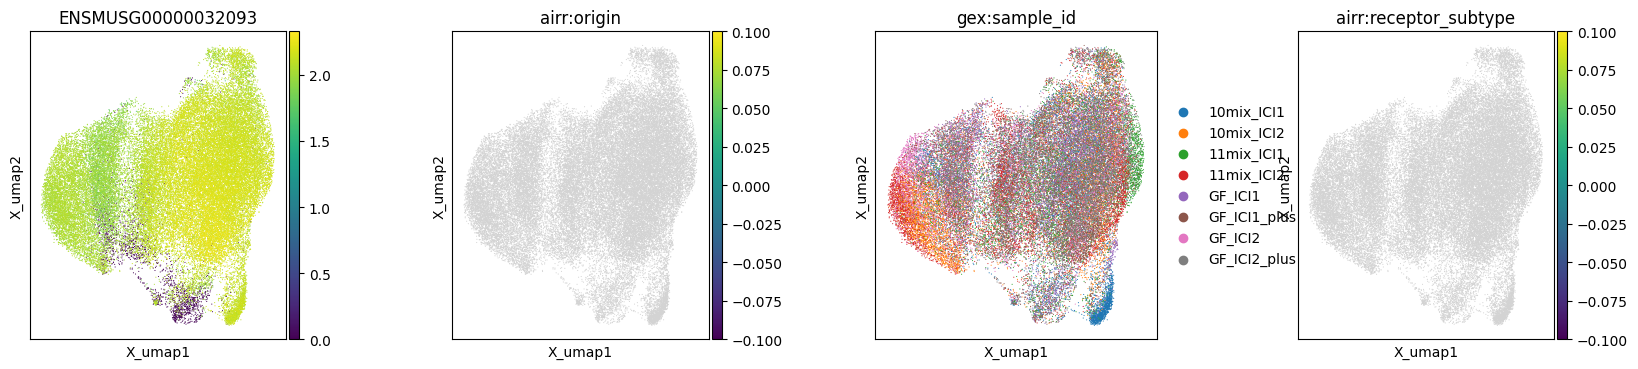

In [112]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata_til, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["airr:origin"], ax=ax1, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["gex:sample_id"], ax=ax2, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3)